In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Import the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
# Feature Scaling  (normalization)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
# Creating a data structure with 60 timesteps and 1 output
# مقادیر 60 روز گذشته را بررسی میکند و مقدار جدید را پیش بینی میکند
X_train = []
y_train = []

for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [11]:
# Reshaping data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
# Initializing the RNN
regressor = Sequential()

# Add first lstm layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# بیست درصد از نورون های این لایه غیرفعال می شوند تا اورفیتینگ رخ ندهد
regressor.add(Dropout(0.2))

In [14]:
# Add second layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
# Add third layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [16]:
# Add fourth layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [17]:
# Add output layer
regressor.add(Dense(units=1))

In [18]:
# compile RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Fitting RNN to the training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

In [20]:
# Get real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [21]:
# Getting predicted price for january 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# تبدیل به آرایه دو بعدی چون sc فقط روی داده های دو بعدی کار می کند
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [22]:
predicted_stock_price

array([[779.78625],
       [776.73035],
       [777.0429 ],
       [777.97656],
       [780.88196],
       [786.36786],
       [790.9495 ],
       [792.27435],
       [792.33203],
       [792.1894 ],
       [792.172  ],
       [792.1422 ],
       [792.2116 ],
       [793.0819 ],
       [794.29315],
       [799.53296],
       [806.6    ],
       [813.8286 ],
       [817.2903 ],
       [812.4221 ]], dtype=float32)

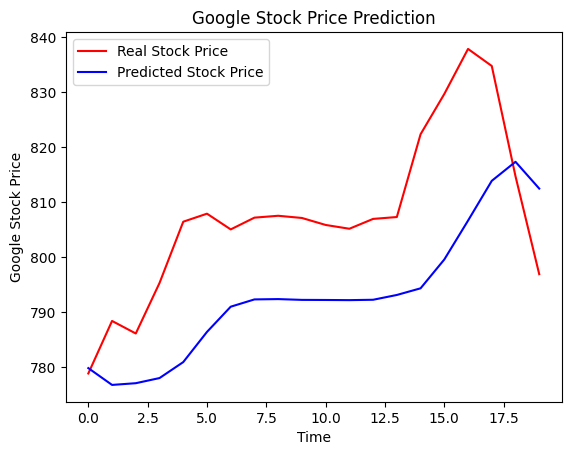

In [23]:
# Visualizing resualt

plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()